# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check software and hardware.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.0.178 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


# Data structure

The training data set is stored in **./datasets/smalltrain** and the validation data set is stored in **./datasets/smallvalid**. The data sets contain images and the corresponding labels stored in **./datasets/smalltrain/images** and **./datasets/smalltrain/labels** for the training data set and in **./datasets/smallvalid/images** and **./datasets/smallvalid/labels** for the validation dataset.

# Training from scratch

In [5]:
# Load a model
model = YOLO('yolov8n.yaml')

# Train
results = model.train(data='data.yaml', epochs=50, imgsz=640)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [6]:
# Load trained model
model = YOLO('runs/detect/train/weights/best.pt')

# Validate the model
metrics = model.val()
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps

Ultralytics YOLOv8.0.178 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/CVSSL/dataset/smallvalid/labels.cache... 500 images, 0 backgrounds, 1 corrupt: 100%|██████████| 500/500 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/CVSSL/dataset/smallvalid/images/000000080340_jpg.rf.6f2d70ed4bad6b45d1b4d2938355f97d.jpg: ignoring corrupt image/label: negative label values [ -0.0041043]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:21<00:00,  1.49it/s]
                   all        499       2810      0.711      0.534       0.59       0.34
                Person        499       2035       0.64      0.431       0.48       0.25
                  Face        499        775      0.783      0.636      0.699       0.43
Speed: 0.4ms preprocess, 5.9ms inference, 0.0ms loss, 2.4ms postprocess per image
Res

array([    0.25039,     0.42952])

# Training with pretrained weights

In [7]:
# Load a model
model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# Train
results = model.train(data='data.yaml', epochs=50, imgsz=640)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [8]:
# Load trained model
model = YOLO('runs/detect/train2/weights/best.pt')

# Validate the model
metrics = model.val()
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps

Ultralytics YOLOv8.0.178 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/CVSSL/dataset/smallvalid/labels.cache... 500 images, 0 backgrounds, 1 corrupt: 100%|██████████| 500/500 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/CVSSL/dataset/smallvalid/images/000000080340_jpg.rf.6f2d70ed4bad6b45d1b4d2938355f97d.jpg: ignoring corrupt image/label: negative label values [ -0.0041043]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:14<00:00,  2.22it/s]
                   all        499       2810      0.794      0.647       0.73       0.47
                Person        499       2035      0.715      0.561      0.626      0.382
                  Face        499        775      0.873      0.733      0.834      0.558
Speed: 0.4ms preprocess, 4.3ms inference, 0.0ms loss, 2.2ms postprocess per image
Res

array([    0.38186,     0.55774])

## Classification

1. With weights trained from scratch


In [12]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!yolo task=classify mode=predict model='runs/detect/train/weights/best.pt' source='/content/bus.jpg' save=True

WARNING ⚠️ conflicting 'task=classify' passed with 'task=detect' model. Ignoring 'task=classify' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.0.178 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients

image 1/1 /content/bus.jpg: 640x480 5 Persons, 2 Faces, 175.0ms
Speed: 3.5ms preprocess, 175.0ms inference, 338.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


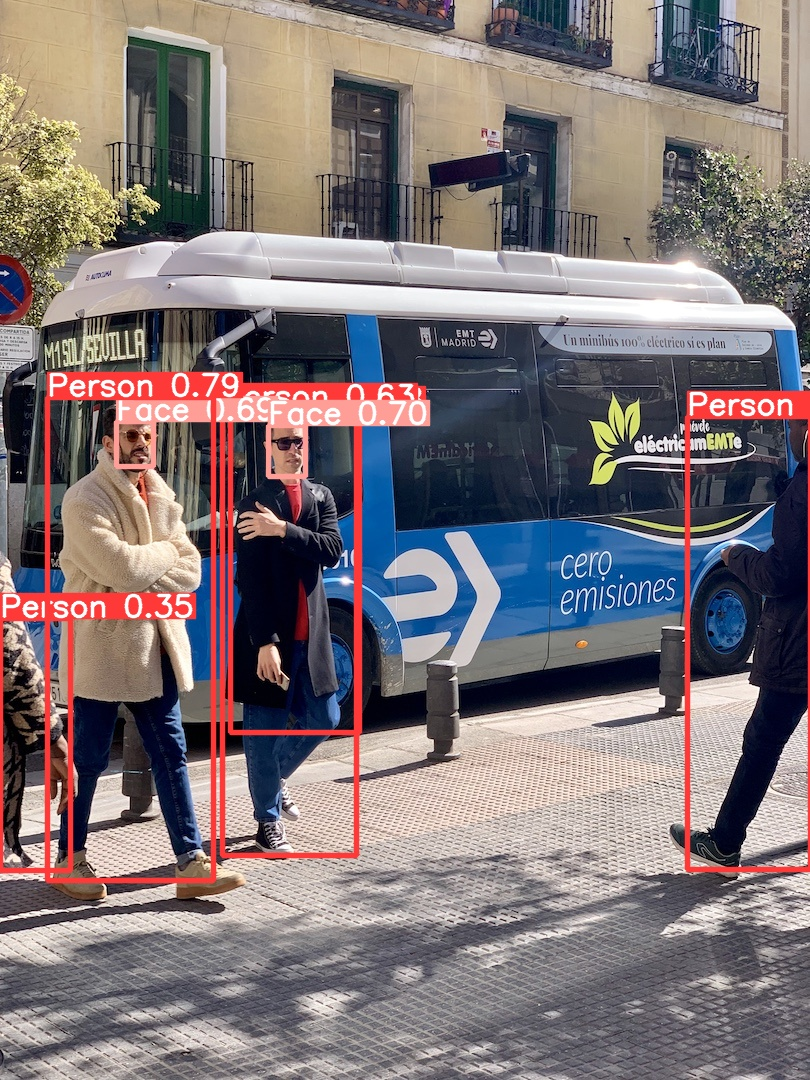

In [13]:
# Display the output image
Image(filename='runs/detect/predict/bus.jpg', height=600)

2. With weights trained starting from `yolov8n.pt`

In [15]:
!yolo task=classify mode=predict model='runs/detect/train2/weights/best.pt' source='/content/bus.jpg' save=True

WARNING ⚠️ conflicting 'task=classify' passed with 'task=detect' model. Ignoring 'task=classify' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.0.178 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients

image 1/1 /content/bus.jpg: 640x480 3 Persons, 2 Faces, 97.3ms
Speed: 3.7ms preprocess, 97.3ms inference, 115.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


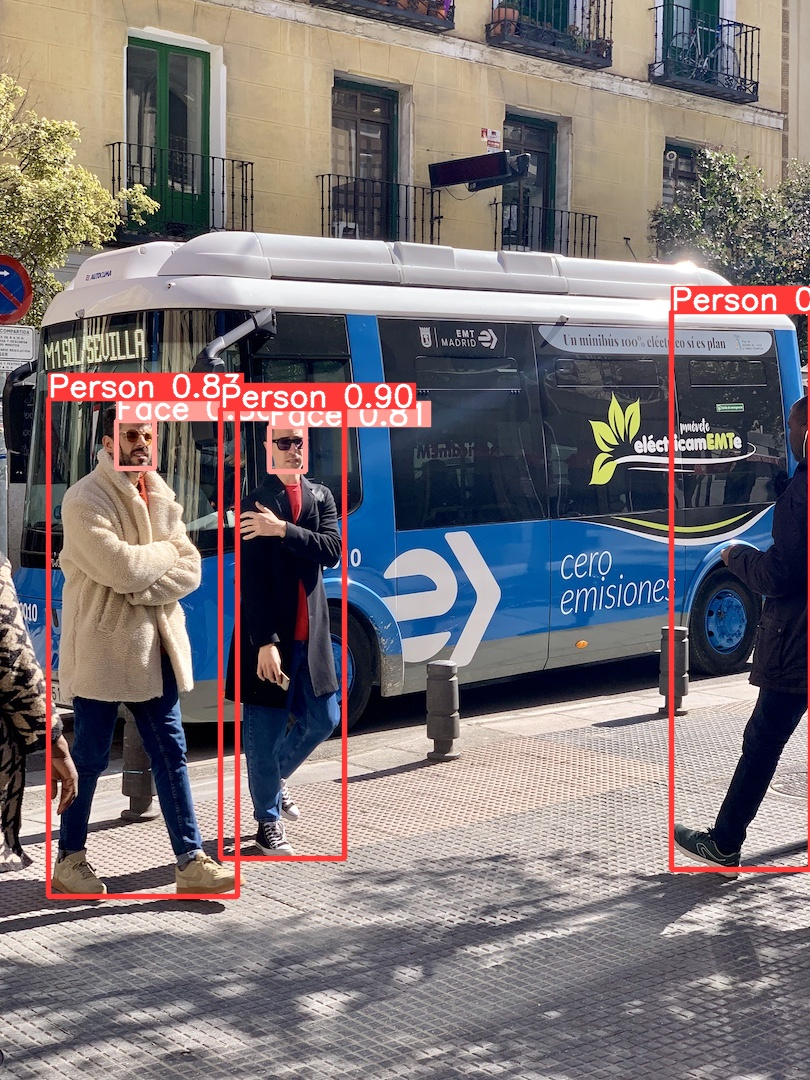

In [16]:
# Display the output image
Image(filename='runs/detect/predict2/bus.jpg', height=600)

Model 2 gives better accuracy, because the we start with a fairly decent weights and then finetune it for person-face datasets